## Importing Necessary Libraries

In [1]:
#For Numerical libraries
import numpy as np

#To handle data in the form of rows and column
import pandas as pd

#Import seaborn for stastetical plots
import seaborn as sns

#importing libraries
import matplotlib.pyplot as plt

#styling figures
#plt.rc('font',size=14)
#sns.set(style='white')
#sns.set(style='whitegrid',color_codes=True)

#To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Import stats from scipy
from scipy import stats

# Import zscore for scaling
from scipy.stats import zscore

#Import the metrics
from sklearn import metrics

#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split

# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor

#importing the K fold
from sklearn.model_selection import KFold

#importing the cross validation score
from sklearn.model_selection import cross_val_score

#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor

# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)

# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor

# Import support vector regressor machine learning library
from sklearn.svm import SVR

## Load the dataset

In [2]:
concrete_data = pd.read_csv("concrete.csv")
concrete_data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
concrete_data.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


## Exploratory data quality report

In [4]:
#To get information of null in columns and total entries per column
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


###### Observation:
All the columns are of numeric type and do not have null values


In [5]:
concrete_data.shape

(1030, 9)

It shows shape of the dataset as 1030 rows and 9 columns.

In [6]:
#Analyse distribution of the data
concrete_data.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [7]:
concrete_data.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [8]:
concrete_data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.

cement, ash,coarseagg, fineagg, strengh are moderately skewed 

### Univariate analysis

#### Description of indepedant variables


##### cement

In [9]:
#Central values 
print('Minimum val: ', concrete_data['cement'].min())
print('Maximum value: ',concrete_data['cement'].max())
print('Mean value: ', concrete_data['cement'].mean())
print('Median value: ',concrete_data['cement'].median())
print('Standard deviation: ', concrete_data['cement'].std())

Minimum val:  102.0
Maximum value:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


In [10]:
#Quartiles

Q1=concrete_data['cement'].quantile(q=0.25)
Q3=concrete_data['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [11]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [12]:
print('Number of outliers in cement upper : ', concrete_data[concrete_data['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete_data[concrete_data['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete_data[concrete_data['cement']>586.4375]['cement'].count()*100/len(concrete_data)), '%')
print('% of Outlier in cement lower: ',round(concrete_data[concrete_data['cement']<-44.0625]['cement'].count()*100/len(concrete_data)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


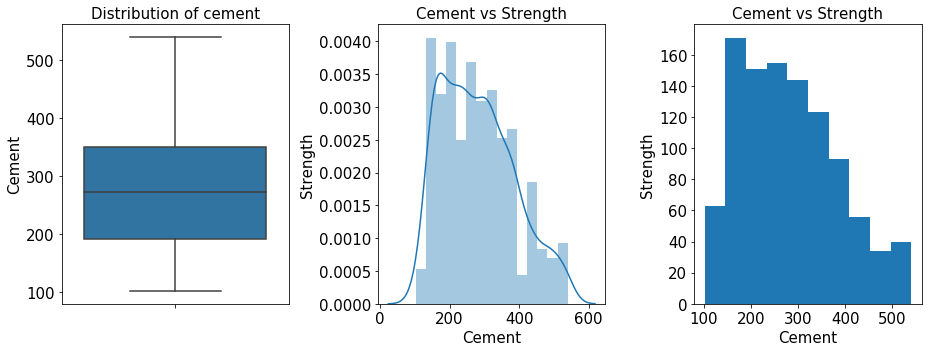

In [13]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='cement',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_data['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Slag

In [14]:
#Range of values 
print('Range of values: ', concrete_data['slag'].max()-concrete_data['slag'].min())

Range of values:  359.4


In [15]:
#Central values

print('Minimum slag: ', concrete_data['slag'].min())
print('Maximum slag: ',concrete_data['slag'].max())
print('Mean value: ', concrete_data['slag'].mean())
print('Median value: ',concrete_data['slag'].median())
print('Standard deviation: ', concrete_data['slag'].std())
print('Null values: ',concrete_data['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


In [16]:
#Quartiles

Q1=concrete_data['slag'].quantile(q=0.25)
Q3=concrete_data['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [17]:
#Quartiles

Q1=concrete_data['slag'].quantile(q=0.25)
Q3=concrete_data['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [18]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [19]:
print('Number of outliers in slag upper : ', concrete_data[concrete_data['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', concrete_data[concrete_data['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(concrete_data[concrete_data['slag']>357.375]['slag'].count()*100/len(concrete_data)), '%')
print('% of Outlier in slag lower: ',round(concrete_data[concrete_data['slag']<-214.425]['slag'].count()*100/len(concrete_data)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


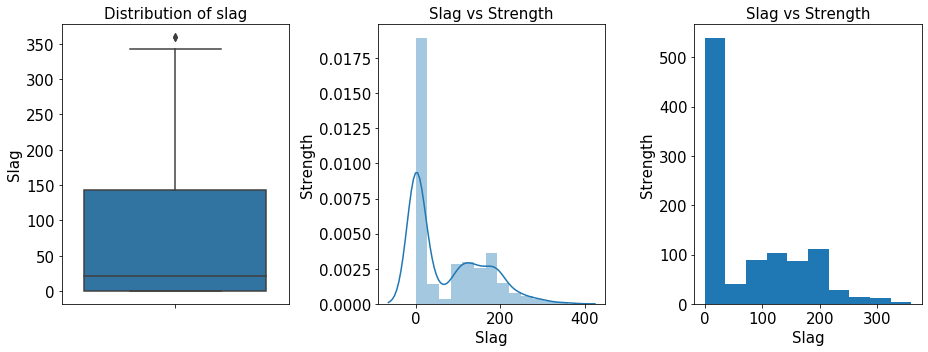

In [20]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_data['slag'],ax=ax2)
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['slag'])
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


##### Ash

In [21]:
#Range of values observed

print('Range of values: ', concrete_data['ash'].max()-concrete_data['ash'].min())

Range of values:  200.1


In [22]:
#Central values

print('Minimum ash: ', concrete_data['ash'].min())
print('Maximum ash: ',concrete_data['ash'].max())
print('Mean value: ', concrete_data['ash'].mean())
print('Median value: ',concrete_data['ash'].median())
print('Standard deviation: ', concrete_data['ash'].std())

Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794


In [23]:
#Quartiles 

Q1=concrete_data['ash'].quantile(q=0.25)
Q3=concrete_data['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [24]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [25]:
print('Number of outliers in ash upper : ', concrete_data[concrete_data['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', concrete_data[concrete_data['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(concrete_data[concrete_data['ash']>295.75]['ash'].count()*100/len(concrete_data)), '%')
print('% of Outlier in ash lower: ',round(concrete_data[concrete_data['ash']<-177.45]['ash'].count()*100/len(concrete_data)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


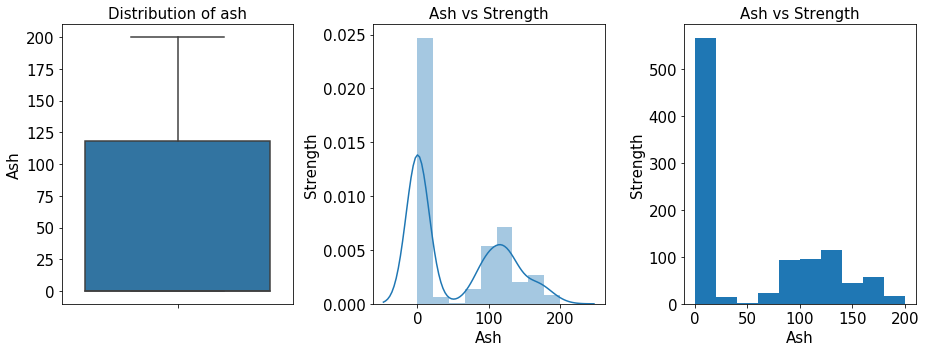

In [26]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_data['ash'],ax=ax2)
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['ash'])
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


##### Water

In [27]:
#Range of values observed

print('Range of values: ', concrete_data['water'].max()-concrete_data['water'].min())

Range of values:  125.2


In [28]:
#Central values
print('Minimum water: ', concrete_data['water'].min())
print('Maximum water: ',concrete_data['water'].max())
print('Mean value: ', concrete_data['water'].mean())
print('Median value: ',concrete_data['water'].median())
print('Standard deviation: ', concrete_data['water'].std())
print('Null values: ',concrete_data['water'].isnull().any())

Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
Null values:  False


In [29]:
#Quartiles
Q1=concrete_data['water'].quantile(q=0.25)
Q3=concrete_data['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [30]:
# Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [31]:
print('Number of outliers in water upper : ', concrete_data[concrete_data['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', concrete_data[concrete_data['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(concrete_data[concrete_data['water']>232.65]['water'].count()*100/len(concrete_data)), '%')
print('% of Outlier in water lower: ',round(concrete_data[concrete_data['water']<124.25]['water'].count()*100/len(concrete_data)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


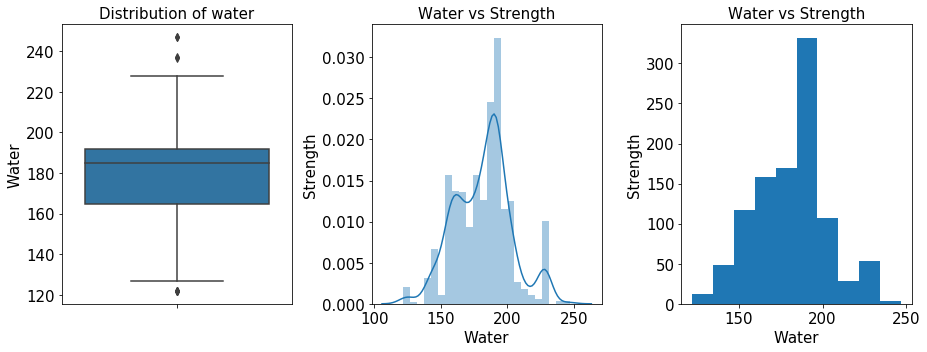

In [32]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_data['water'],ax=ax2)
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['water'])
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


##### Superplastic

In [33]:
#Range of values observed

print('Range of values: ', concrete_data['superplastic'].max()-concrete_data['superplastic'].min())

Range of values:  32.2


In [34]:
#Central values

print('Minimum superplastic: ', concrete_data['superplastic'].min())
print('Maximum superplastic: ',concrete_data['superplastic'].max())
print('Mean value: ', concrete_data['superplastic'].mean())
print('Median value: ',concrete_data['superplastic'].median())
print('Standard deviation: ', concrete_data['superplastic'].std())
print('Null values: ',concrete_data['superplastic'].isnull().any())


Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
Null values:  False


In [35]:
#Quartiles

Q1=concrete_data['superplastic'].quantile(q=0.25)
Q3=concrete_data['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [36]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [37]:
print('Number of outliers in superplastic upper : ', concrete_data[concrete_data['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', concrete_data[concrete_data['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(concrete_data[concrete_data['superplastic']>25.5]['superplastic'].count()*100/len(concrete_data)), '%')
print('% of Outlier in superplastic lower: ',round(concrete_data[concrete_data['superplastic']<-15.3]['superplastic'].count()*100/len(concrete_data)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


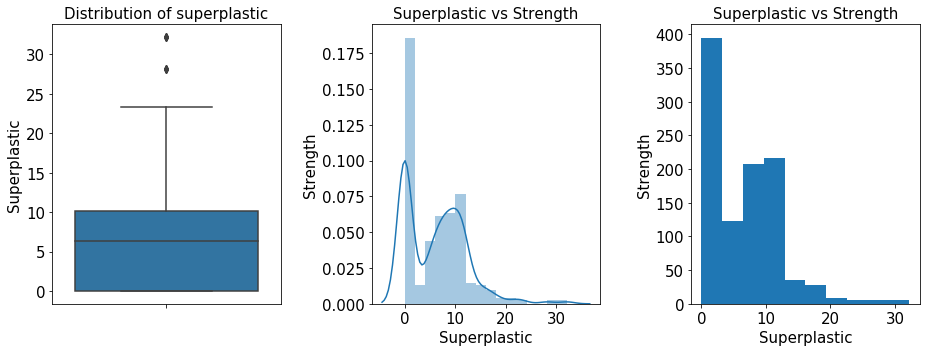

In [38]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_data['superplastic'],ax=ax2)
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['superplastic'])
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

##### Coarseagg

In [39]:

#Range of values observed

print('Range of values: ', concrete_data['coarseagg'].max()-concrete_data['coarseagg'].min())

Range of values:  344.0


In [40]:
#Central values

print('Minimum value: ', concrete_data['coarseagg'].min())
print('Maximum value: ',concrete_data['coarseagg'].max())
print('Mean value: ', concrete_data['coarseagg'].mean())
print('Median value: ',concrete_data['coarseagg'].median())
print('Standard deviation: ', concrete_data['coarseagg'].std())
print('Null values: ',concrete_data['coarseagg'].isnull().any())


Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
Null values:  False


In [41]:
#Quartiles

Q1=concrete_data['coarseagg'].quantile(q=0.25)
Q3=concrete_data['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [42]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [43]:
print('Number of outliers in coarseagg upper : ', concrete_data[concrete_data['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', concrete_data[concrete_data['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(concrete_data[concrete_data['coarseagg']>1175.5]['coarseagg'].count()*100/len(concrete_data)), '%')
print('% of Outlier in coarseagg lower: ',round(concrete_data[concrete_data['coarseagg']<785.9]['coarseagg'].count()*100/len(concrete_data)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

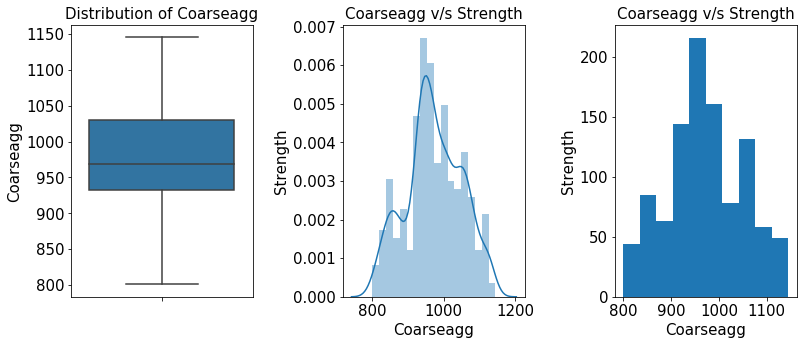

In [44]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))



#boxplot

sns.boxplot(x='coarseagg',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of Coarseagg',fontsize=15)
ax1.tick_params(labelsize=15)

#distplot

sns.distplot(concrete_data['coarseagg'], ax=ax2)
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg v/s Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['coarseagg'])
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg v/s Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout


##### Fineagg

In [45]:
#Range of values observed

print('Range of Values: ', concrete_data['fineagg'].max()-concrete_data['fineagg'].min())

Range of Values:  398.6


In [46]:
#central Values


print('Minimum value: ', concrete_data['fineagg'].min())
print('Maximum value: ',concrete_data['fineagg'].max())
print('Mean value: ', concrete_data['fineagg'].mean())
print('Median value: ',concrete_data['fineagg'].median())
print('Standard deviation: ', concrete_data['fineagg'].std())
print('Null values: ',concrete_data['fineagg'].isnull().any())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
Null values:  False


In [47]:
# Quartiles

Q1=concrete_data['fineagg'].quantile(q=0.25)
Q3=concrete_data['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ',stats.iqr(concrete_data['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [48]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)


Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [49]:
print('Number of outliers in fineagg upper : ',concrete_data[concrete_data['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_data[concrete_data['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_data[concrete_data['fineagg']>963.575]['fineagg'].count()*100/len(concrete_data)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_data[concrete_data['fineagg']<591.37]['fineagg'].count()*100/len(concrete_data)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


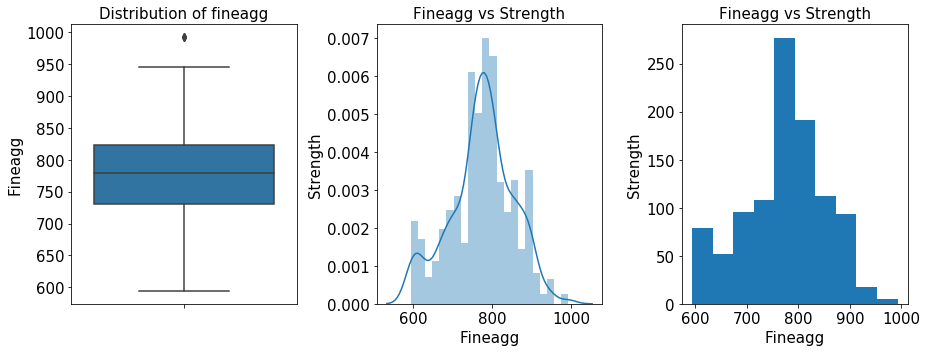

In [50]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_data['fineagg'],ax=ax2)
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['fineagg'])
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


##### Age

In [51]:
#Range of values observed

print('Range of values: ', concrete_data['age'].max()-concrete_data['age'].min())

Range of values:  364


In [52]:
#Central values

print('Minimum age: ', concrete_data['age'].min())
print('Maximum age: ',concrete_data['age'].max())
print('Mean value: ', concrete_data['age'].mean())
print('Median value: ',concrete_data['age'].median())
print('Standard deviation: ', concrete_data['age'].std())
print('Null values: ',concrete_data['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False


In [53]:
#Quartiles

Q1=concrete_data['age'].quantile(q=0.25)
Q3=concrete_data['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_data['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [54]:
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)


Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [55]:
print('Number of outliers in age upper : ', concrete_data[concrete_data['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete_data[concrete_data['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete_data[concrete_data['age']>129.5]['age'].count()*100/len(concrete_data)), '%')
print('% of Outlier in age lower: ',round(concrete_data[concrete_data['age']<-66.5]['age'].count()*100/len(concrete_data)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


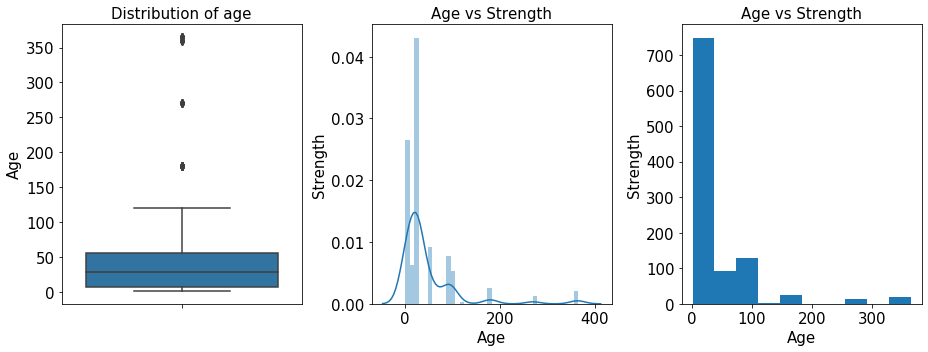

In [56]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_data,orient='v',ax=ax1)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_data['age'],ax=ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_data['age'])
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

### MultiVariate Analysis

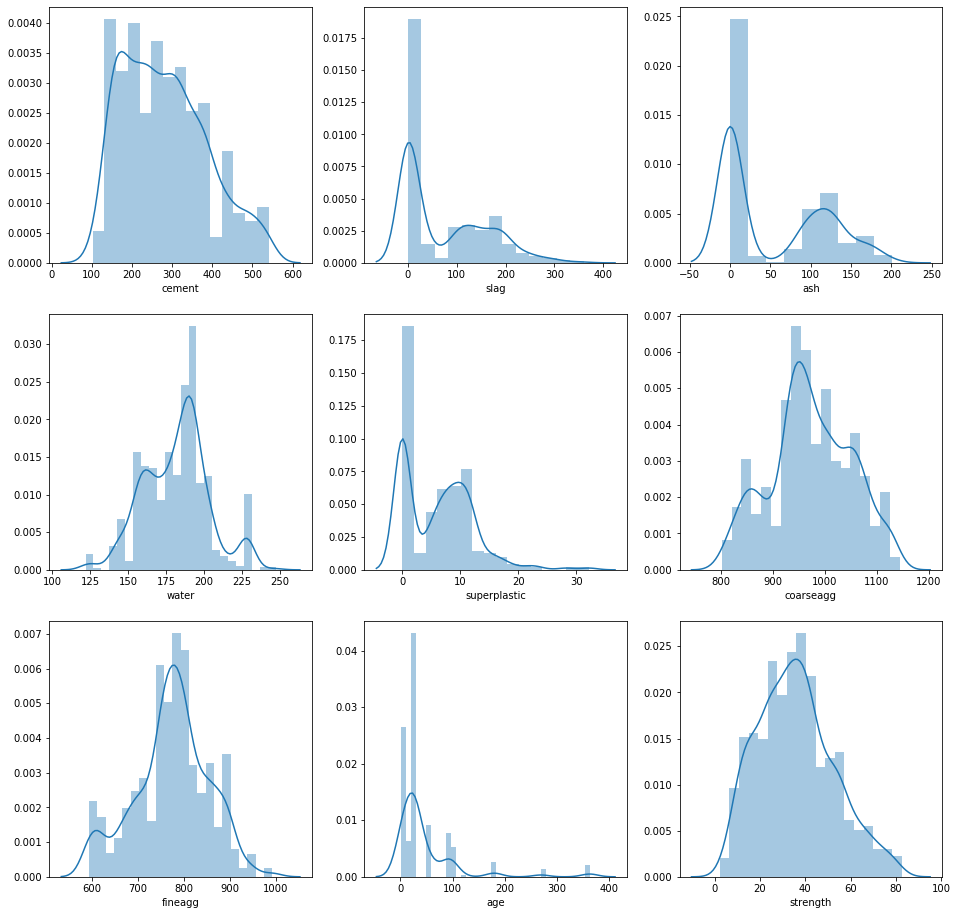

In [57]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_data['cement'],ax=ax2[0][0])
sns.distplot(concrete_data['slag'],ax=ax2[0][1])
sns.distplot(concrete_data['ash'],ax=ax2[0][2])
sns.distplot(concrete_data['water'],ax=ax2[1][0])
sns.distplot(concrete_data['superplastic'],ax=ax2[1][1])
sns.distplot(concrete_data['coarseagg'],ax=ax2[1][2])
sns.distplot(concrete_data['fineagg'],ax=ax2[2][0])
sns.distplot(concrete_data['age'],ax=ax2[2][1])
sns.distplot(concrete_data['strength'],ax=ax2[2][2])

#### Observation

##### We can see observe that :

cement is almost normal.

slag has three gausssians and rightly skewed.

ash has two gaussians and rightly skewed.

water has three guassians and slighly left skewed.

superplastic has two gaussians and rightly skewed.

coarseagg has three guassians and almost normal.

fineagg has almost two guassians and looks like normal.

age has multiple guassians and rightly skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B730E43C8>,
      dtype=object)

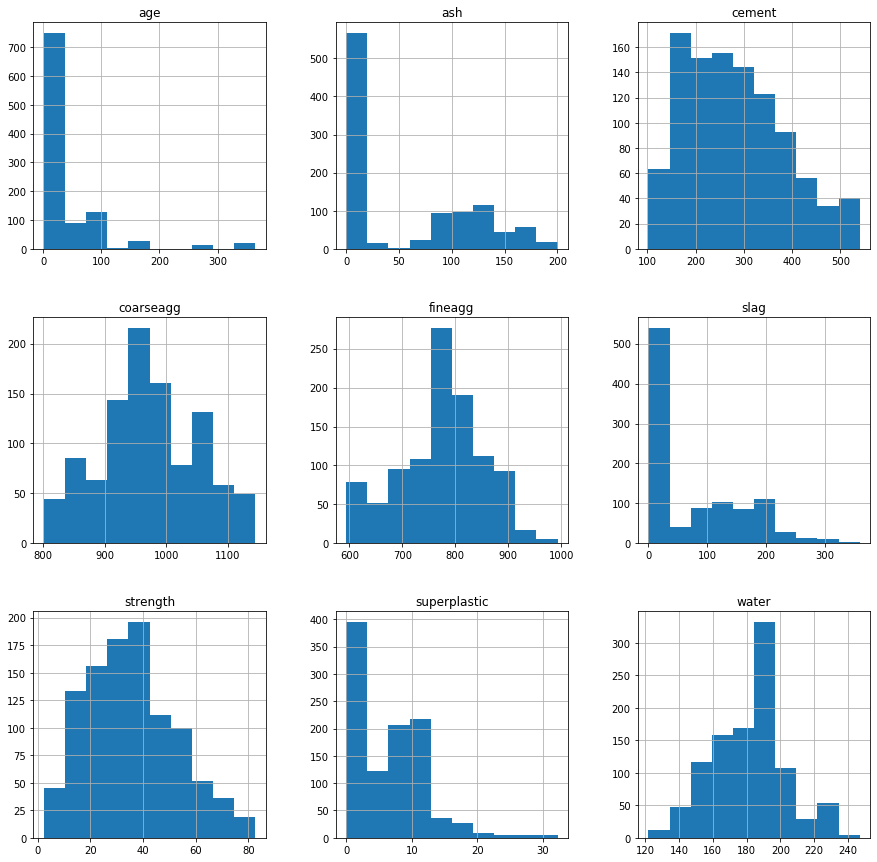

In [58]:
# Histogram
concrete_data.hist(figsize=(15,15))

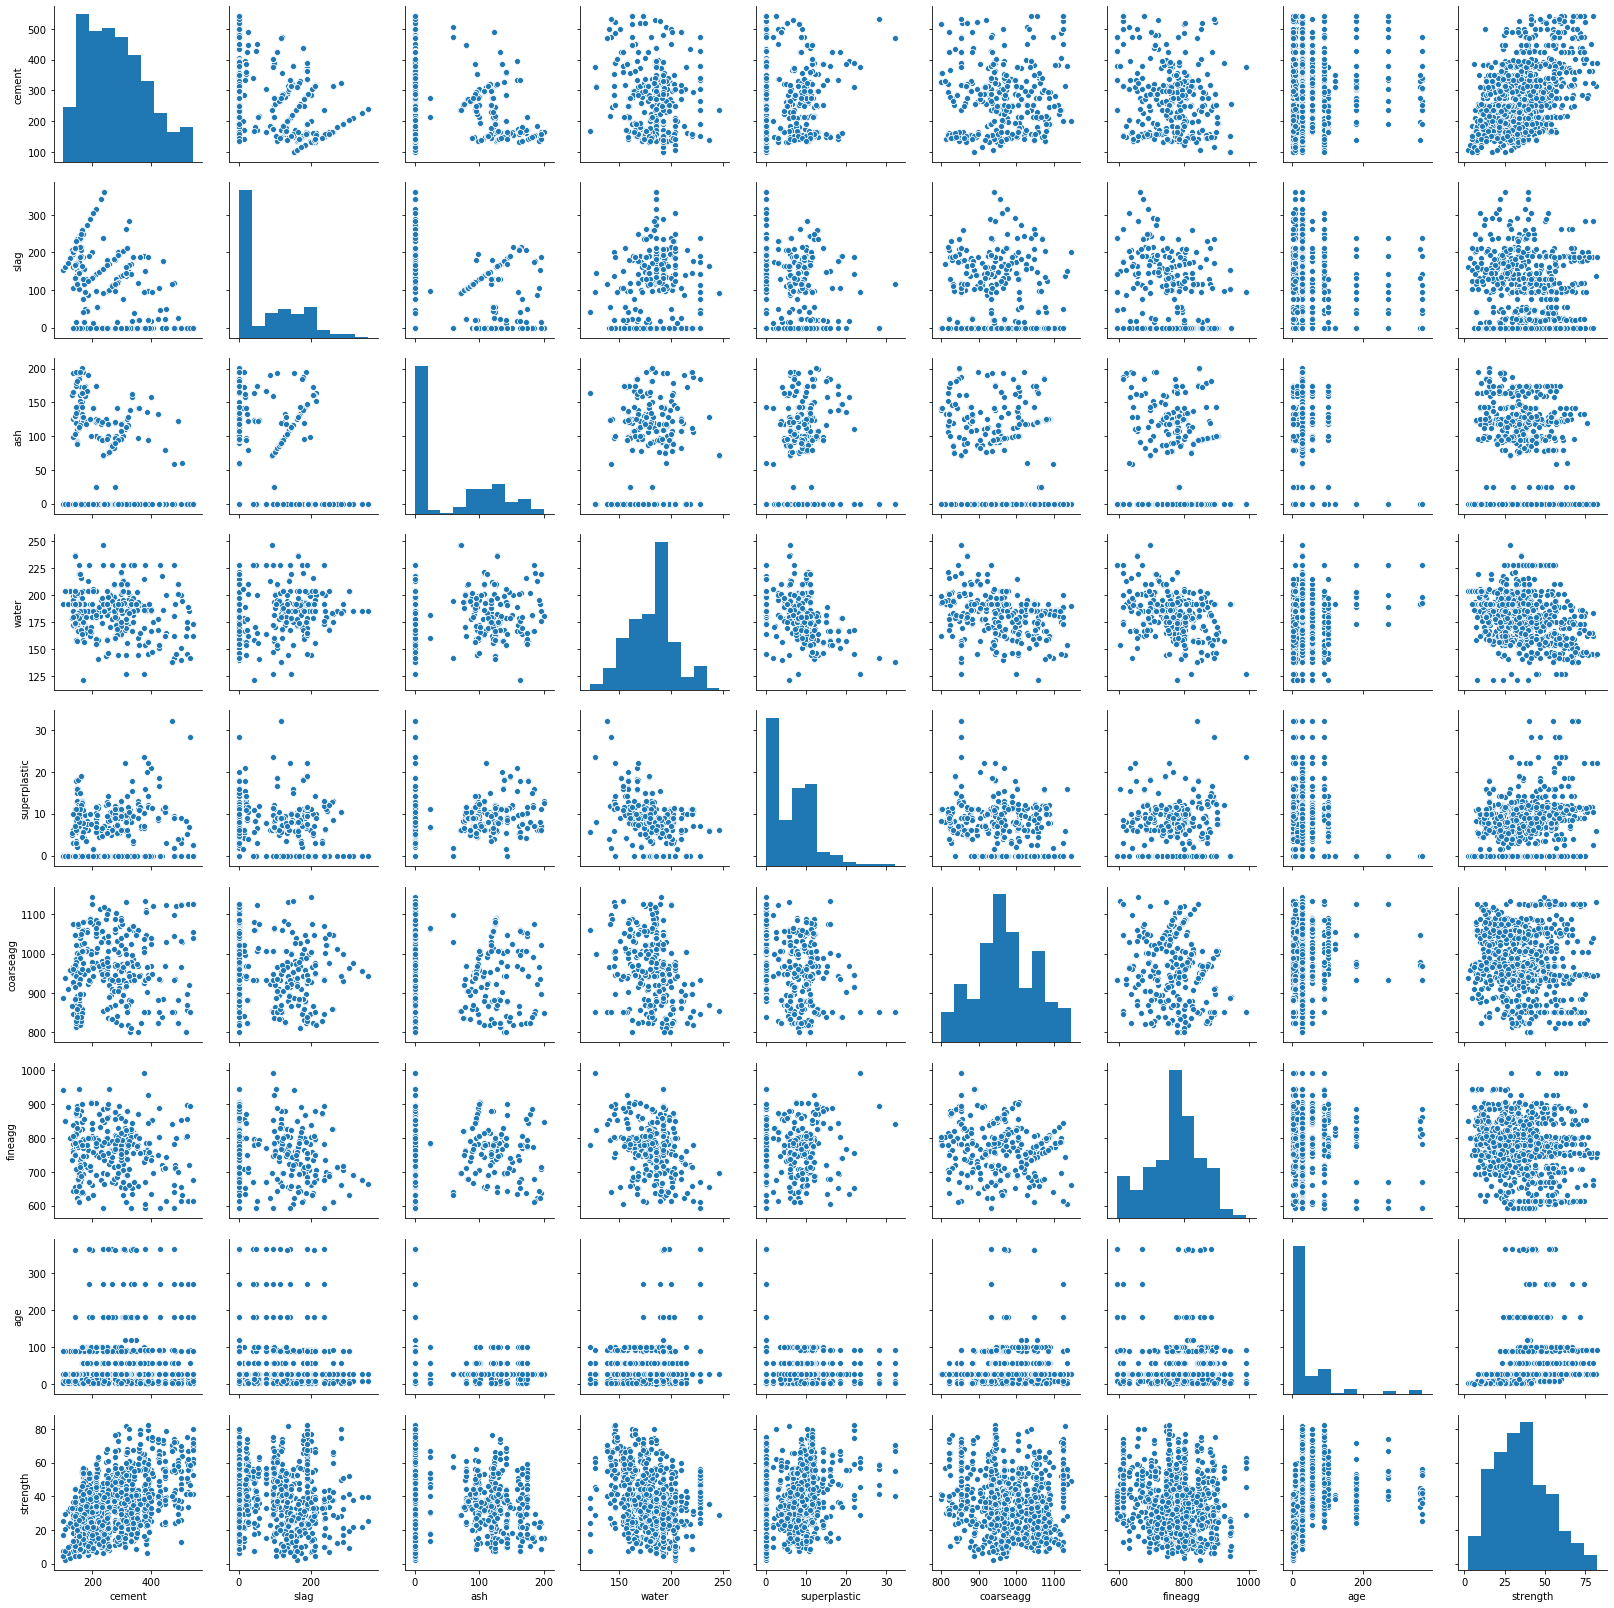

In [59]:
sns.pairplot(concrete_data)

##### Diagonals Analysis 
The diagonal gives the same information, we got using distplot.

cement attribute have almost normal curve.

slag has two gausssians and rightly skewed.It shows the presence of outlies.

ash has two gaussians and rightly skewed.It shows the presence of outlies.

water has atleast guassians and slighly left skewed.It shows the presence of outlies.

superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.

coarseagg has three guassians and almost normal.

fineagg has almost two guassians and looks like normal.

age has multiple guassians and rightly skewed. It shows the presence of outlies.

strength is close to a normal curve.

We not only have missing values problem but also outliers problem in the dataset.

##### Off Diagonal Analysis: Relationship between indpendent attributes

###### Scatter plots

cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.

superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.

coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.

fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.


The reason why we are doing all this analysis is if we find any kind of dimensions which are very strongly correlated i.e. r value close to 1 or -1 such dimensions are giving same information to your algorithms, its a redundant dimension. So in such cases we may want to keep one and drop the other which we should keep and which we should drop depends on again your domain expertise, which one of the dimension is more prone to errors.I would like to drop that dimension. Or we have a choice to combine these dimensions and create a composite dimension out of it.

###### strength attribute : Relationship between dependent and independent attributes

strength: Now its comparing the target column with all other independent attributes and its showing us very vital information.

strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Which one should we pick we don't know. Hence Cement though it has poditive relationship with the strength, it is not a very good predictor. It is a weak predictor. 

strength vs slag: There is no particular trend. 

strength vs slag: There is also no particular trend. 

strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor. 

strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor. 

Other attributes does not give any strong relationship with strength. Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model

In [60]:
# corrlation matrix 
cor=concrete_data.corr()
cor

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


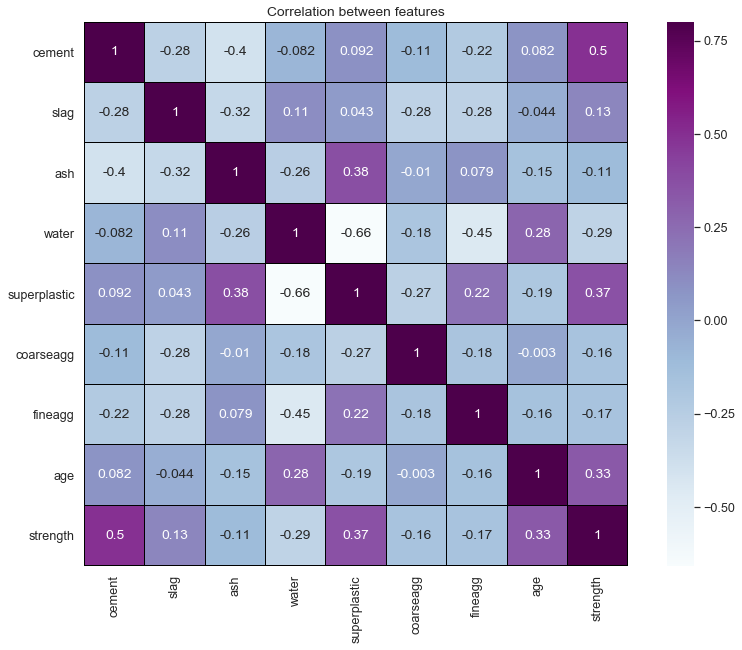

In [61]:
sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap="BuPu",linecolor="black")
plt.title('Correlation between features');

1. It is also giving the same information we observed in pairplot analysis.
2. water shows significant negative relationship with superplastic and fineagg. It also shows some kind of positive relationship with slag and age.

### Handling missing values and Outliers

In [62]:
#Check for the missing values 
concrete_data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

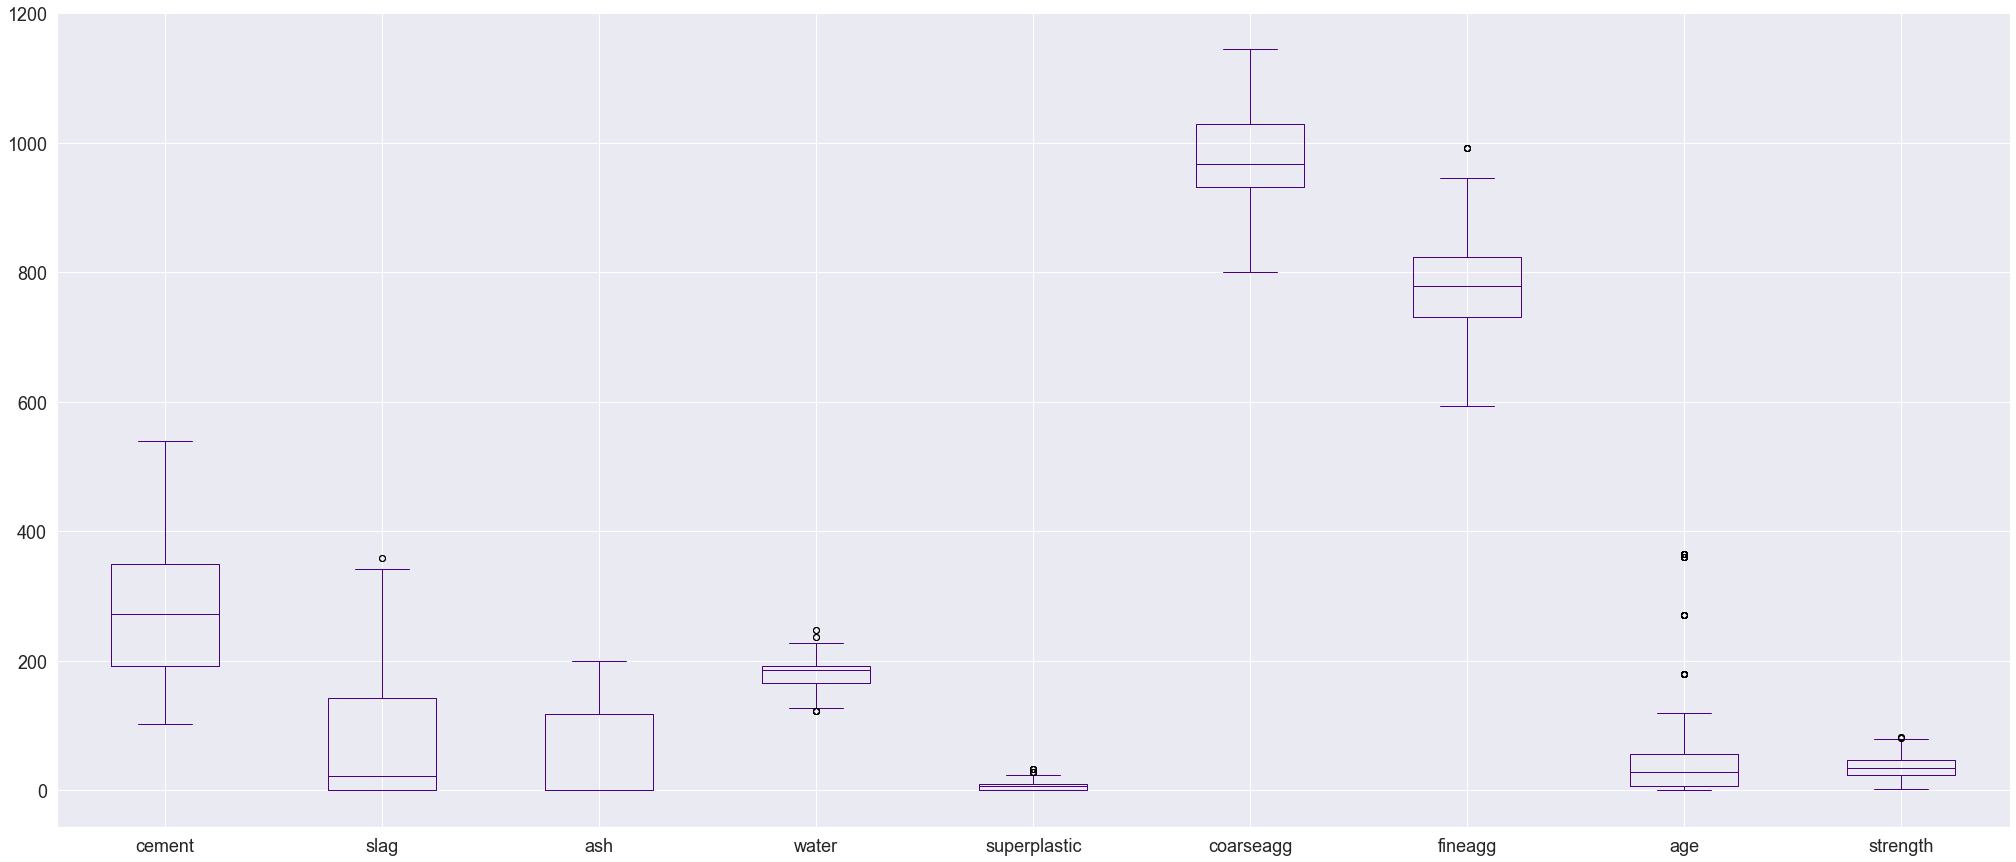

In [63]:
#Checking for outliers
concrete_df1=concrete_data.copy()
concrete_df1.boxplot(figsize=(35,15),color='indigo',fontsize=18)

It shows that slag, ash, water superplastic, and age contains outliers.

In [64]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.

We can see that slag, water, superplastic and age contain outliers.

In [65]:
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])

Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [66]:
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])

Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [67]:
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])

Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [68]:
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])


Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


In [69]:
#Handling the outliers

#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

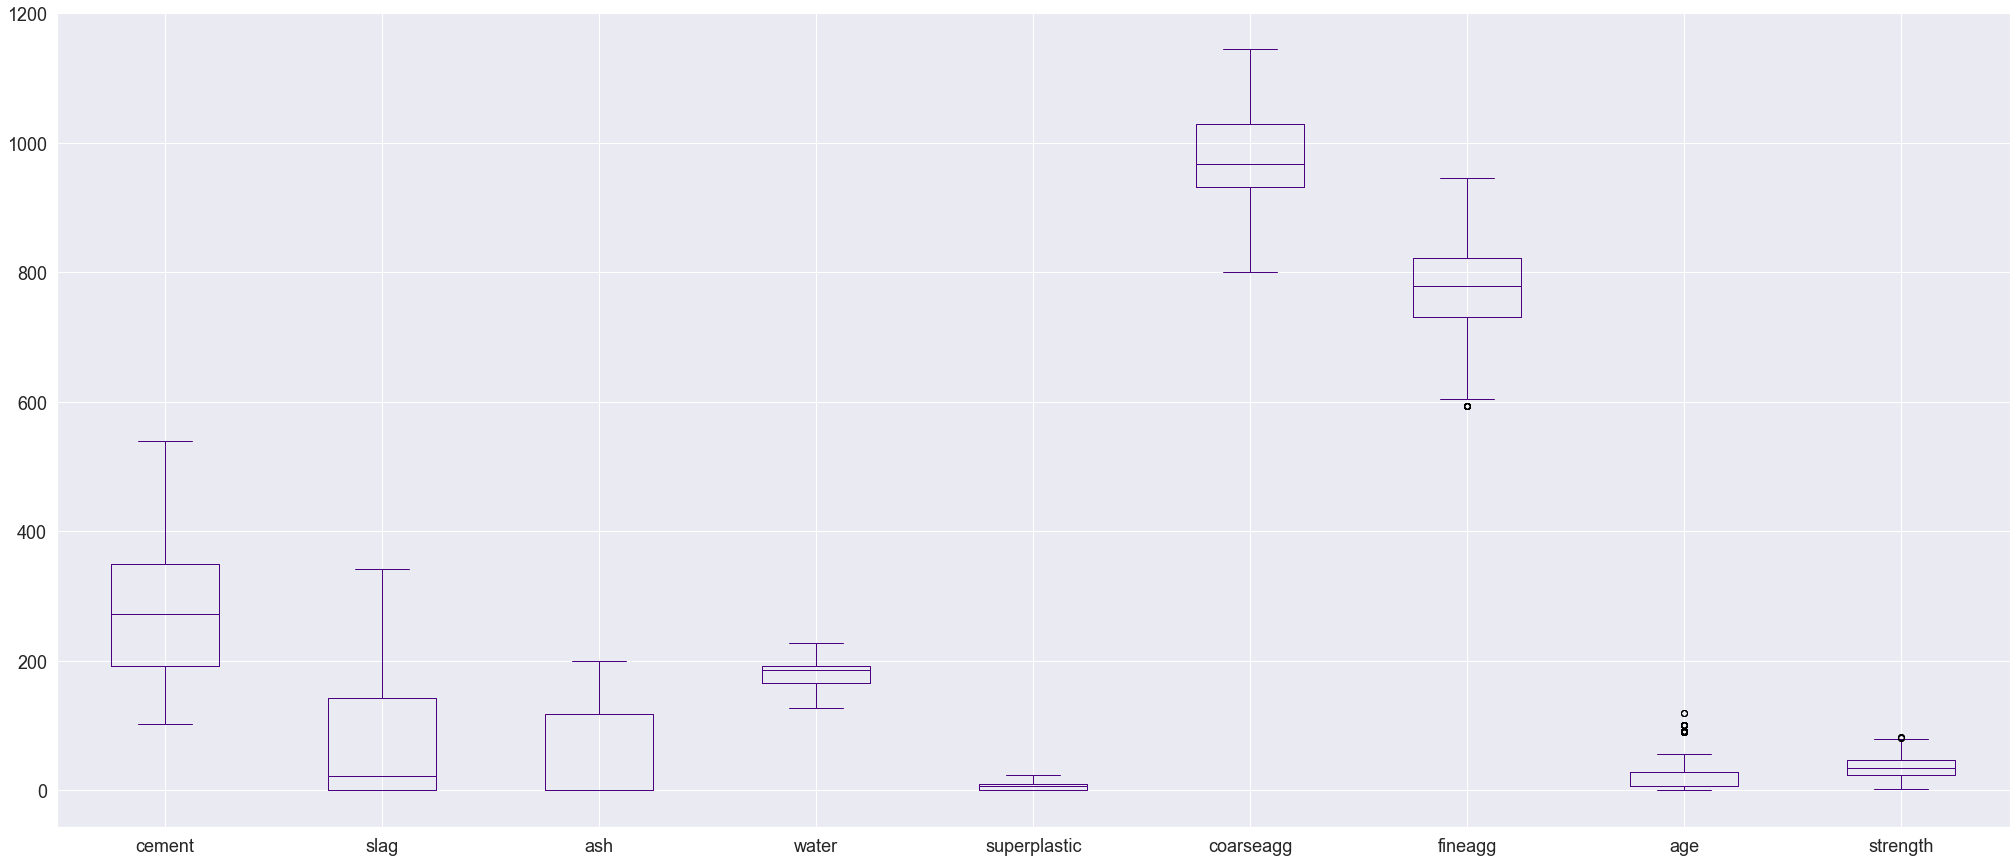

In [70]:
concrete_df1.boxplot(figsize=(35,15),color='indigo',fontsize=18)

### Feature Engineering, Model Building and Model Tuning

In [71]:
#Scaling the features

concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df1.columns)

Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.

In [72]:
#Splitting the data into independent and dependent attributes

#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]


In [73]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)


#### DecisionTree Regression

In [74]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [75]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.354918
slag          0.095432
ash           0.012974
water         0.125677
superplastic  0.014877
coarseagg     0.034688
fineagg       0.032837
age           0.328597


1. So, cement, age and water are significant attributes.
2. Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [76]:
y_pred = dt_model.predict(X_test)

# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.9917907393004437
Performance on testing data using DT: 0.83219005583432
Accuracy DT:  0.8321900558343199
MSE:  0.17517012042674426


There is a overfitting in the model as the dataset is performing 99% accurately in trainnig data. However, the accuracy on test data drops.

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


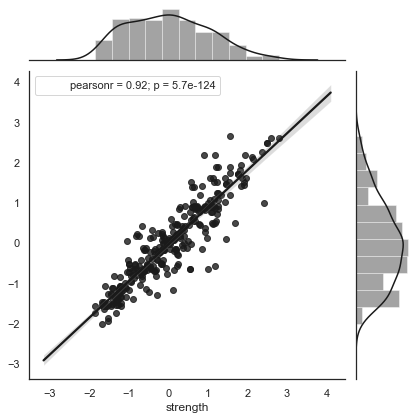

In [77]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [78]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy' : acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.83219


#### K fold cross validation

In [79]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


Average accuracy:  0.8703289354202406
Standard Deviation:  0.03551081167262682


C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329


#### Iteration 2

##### Drop the least significant variable


In [81]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [82]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()

In [83]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [84]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [85]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.373711
slag          0.106387
water         0.162419
superplastic  0.028348
age           0.329136


In [86]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.991045963372976
Performance on testing data using DT: 0.8417877932342919
Accuracy DT:  0.8417877932342919


###### The acuracy on testing dataset is not improved, still it is an overfit model.

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


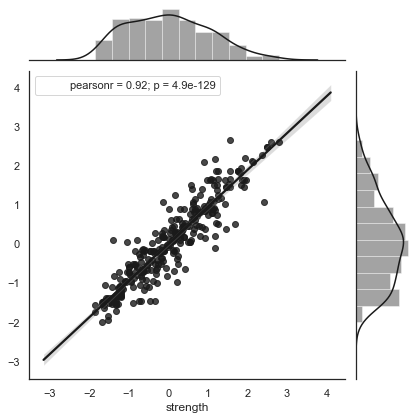

In [87]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [88]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788


#### Regularising/Pruning of Decision Tree

In [89]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [90]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [91]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


Here, we can see that ash,coarseagg and fineagg are least significant variable.

##### Visualizing the Regularized Tree

In [92]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import graphviz
import pydot
bank_df=concrete_df_z.copy()
xvar = bank_df.drop('strength', axis=1)
feature_cols = xvar.columns

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


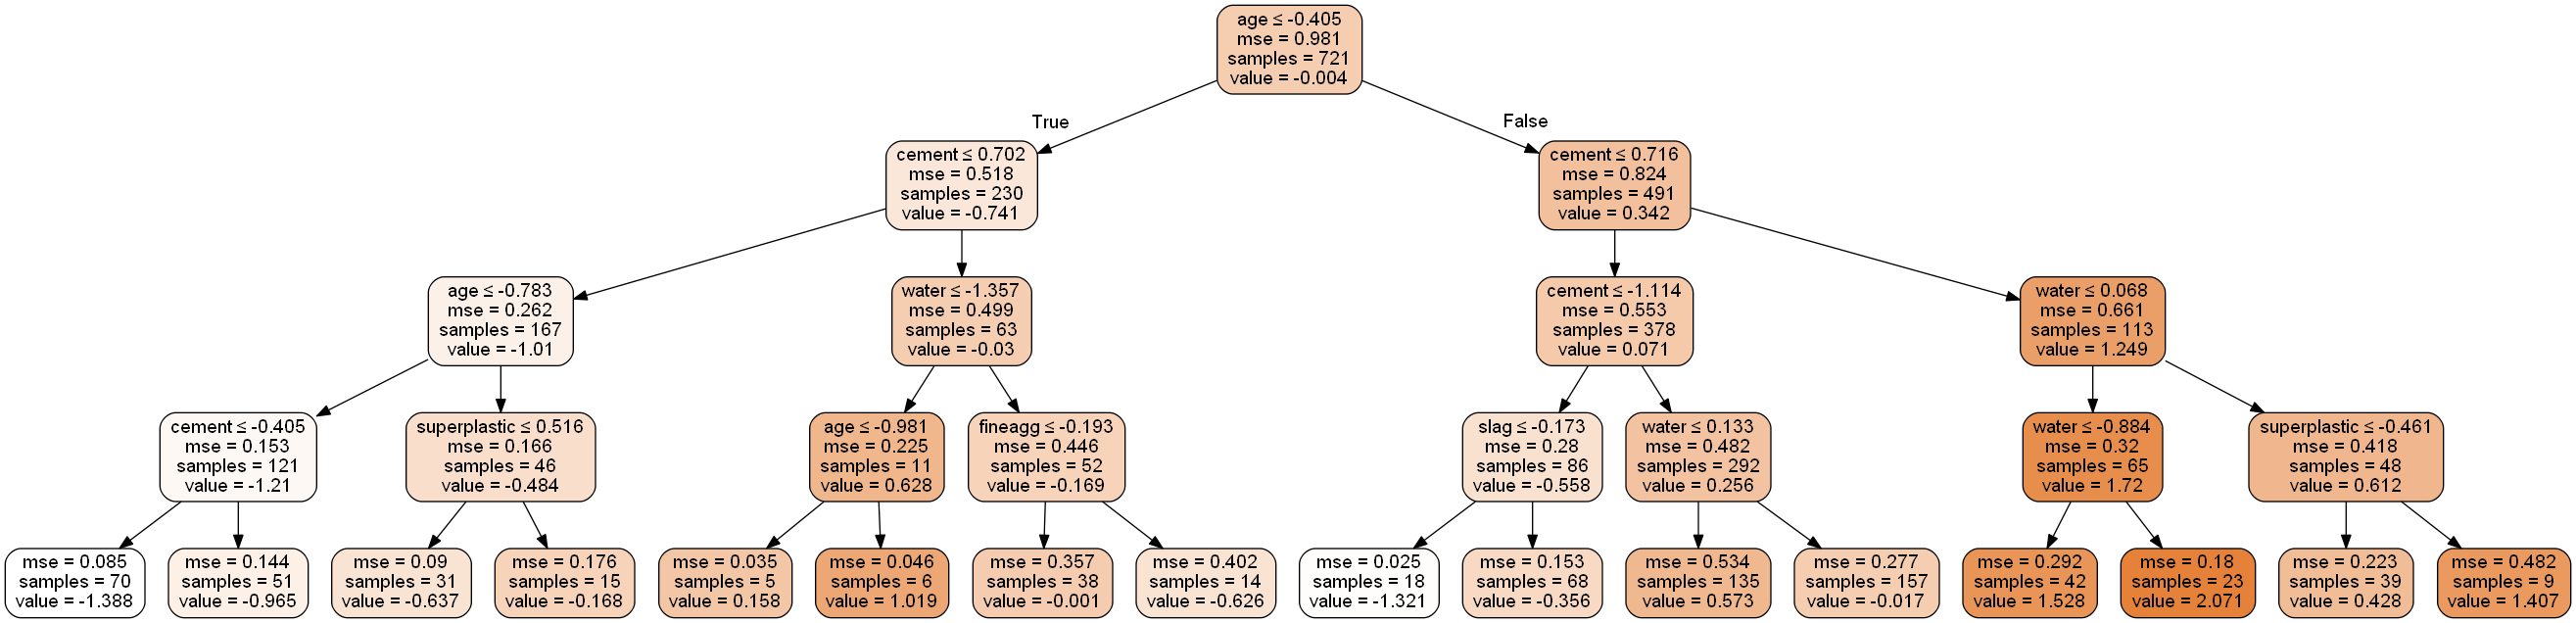

In [93]:
dot_data = StringIO()
export_graphviz(reg_dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('concrete_pruned.png')
Image(graph.create_png())


In [94]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7255811799299218
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129
MSE:  0.36031160369896825


In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828


##### K fold cross validation

In [96]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6745523114433877
Standard Deviation:  0.08608318690710857


C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [97]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552


###### Iteration2

In [98]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [99]:
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [100]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [101]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [102]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468


#### K Means Clustering

In [103]:
cluster_range = range( 1, 15 )  
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(concrete_df1)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,3.709976e+07
1,2,2.774973e+07
2,3,2.141025e+07
3,4,1.881746e+07
4,5,1.659098e+07
5,6,1.469839e+07
6,7,1.355091e+07
7,8,1.233459e+07
8,9,1.140475e+07
9,10,1.048484e+07


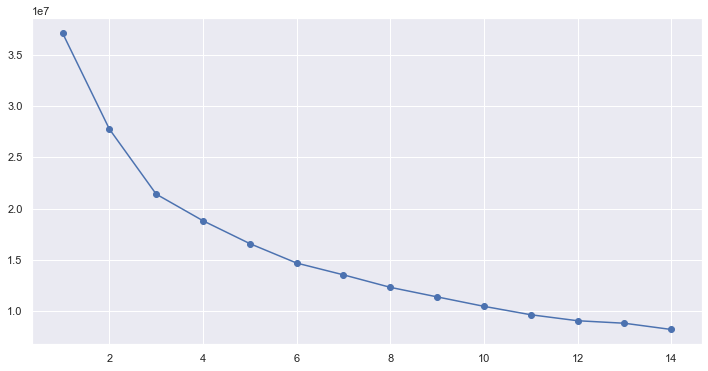

In [104]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


In [105]:
# k=6
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(concrete_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [106]:
# Creating a new column "GROUP" which will hold the cluster id of each record
prediction=cluster.predict(concrete_df_z)
concrete_df_z["GROUP"] = prediction     
# Creating a mirror copy for later re-use instead of building repeatedly
concrete_df_z_copy = concrete_df_z.copy(deep = True)


In [107]:
centroids = cluster.cluster_centers_
centroids

array([[ 1.42968733, -0.43116456, -0.69660733,  1.29402011, -1.00250124,
         0.18767725, -1.65637577,  0.15492823,  0.69946106],
       [-0.60240291, -0.65738879,  1.10652155, -0.60849218,  0.48891967,
         0.62375972,  0.43280415,  0.27008693, -0.14052292],
       [-0.52847035,  0.25047012,  1.10117943,  0.4707871 ,  0.51065443,
        -1.14464266, -0.34207299, -0.2243148 , -0.27815339],
       [ 0.3359461 , -0.856736  , -0.79663152,  0.45094694, -1.02387881,
         0.49051055,  0.41391665, -0.23081884, -0.67438749],
       [-0.86613968,  1.39500011, -0.83813178,  0.59484847, -0.74216816,
        -0.02114166, -0.16158788, -0.17686571, -0.57203728],
       [ 1.00454194,  0.50203623, -0.51368191, -1.01583295,  1.02698603,
        -0.6014763 ,  0.15987254,  0.07455196,  1.1935206 ]])

In [108]:
centroid_df = pd.DataFrame(centroids, columns = list(concrete_df1) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,1.429687,-0.431165,-0.696607,1.294020,-1.002501,0.187677,-1.656376,0.154928,0.699461
1,-0.602403,-0.657389,1.106522,-0.608492,0.488920,0.623760,0.432804,0.270087,-0.140523
2,-0.528470,0.250470,1.101179,0.470787,0.510654,-1.144643,-0.342073,-0.224315,-0.278153
3,0.335946,-0.856736,-0.796632,0.450947,-1.023879,0.490511,0.413917,-0.230819,-0.674387
4,-0.866140,1.395000,-0.838132,0.594848,-0.742168,-0.021142,-0.161588,-0.176866,-0.572037
5,1.004542,0.502036,-0.513682,-1.015833,1.026986,-0.601476,0.159873,0.074552,1.193521


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B7924A8D0>,
      dtype=object)

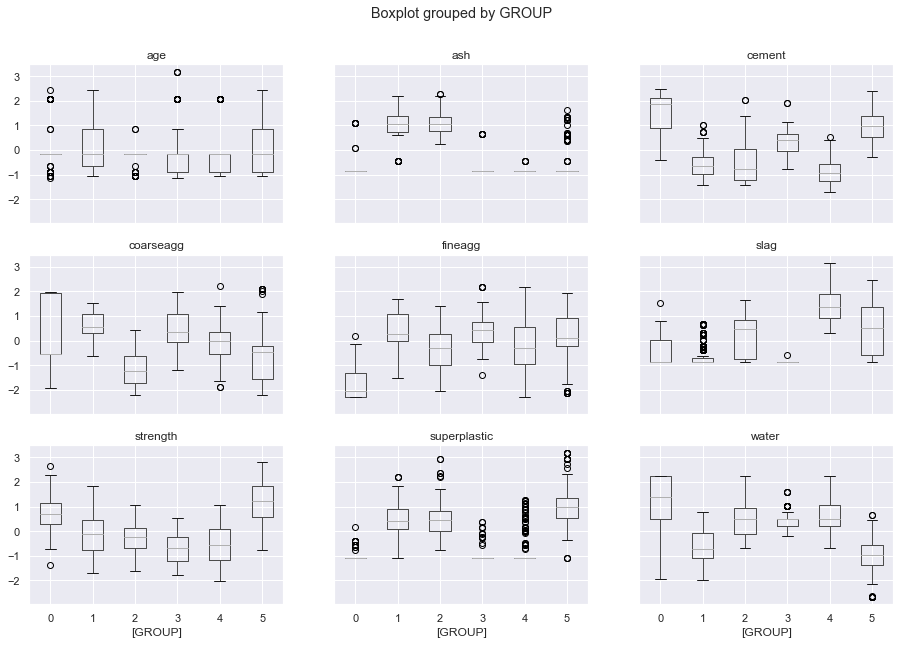

In [109]:
## Instead of interpreting the neumerical values of the centroids, let us do a visual analysis by converting the 
## centroids and the data in the cluster into box plots.
import matplotlib.pylab as plt
concrete_df_z.boxplot(by = 'GROUP',  layout=(3,3), figsize=(15, 10))

1. Here, None of the dimensions are good predictor of target variable.
2. For all the dimensions (variables) every cluster have a similar range of values except in one case.
3. We can see that the body of the cluster are overlapping.
4. So in k means, though, there are clusters in datasets on different dimensions. But we can not see any distinct characteristics of these clusters which tell us to break data into different clusters and build separate models for them.


In [110]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### Random Forest

In [111]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9793240714472208
Performance on testing data using RFR: 0.9049758361041657
Accuracy DT:  0.9049758361041657
MSE:  0.09919194190691018


This model is also overfit.

In [113]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976


##### K fold cross validation

In [114]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.913411943529218
Standard Deviation:  0.03011908391644532


In [115]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412


#### Gradient Boosting Regressor

In [116]:
model=GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [117]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9430469892492805
Performance on testing data using GBR: 0.8915935006027147
Accuracy DT:  0.8915935006027148
MSE:  0.11316122920412669


In [118]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594


###### K fold cross validation

In [119]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.8996511768274884
Standard Deviation:  0.02611180037101237


In [120]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


#### Ada Boosting Regressor

In [121]:
model=AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [122]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.8174805910287983
Performance on testing data using GBR: 0.7699782656003489
Accuracy DT:  0.7699782656003489
MSE:  0.2401105316844271


In [123]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


###### K fold cross validation

In [124]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.7756218831785716
Standard Deviation:  0.03985042924545495


In [125]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


#### Bagging Regressor

In [126]:
model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [127]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9742017338329342
Performance on testing data using GBR: 0.8906427767363475
Accuracy DT:  0.8906427767363475
MSE:  0.11415365200119117


In [128]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'13'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


##### K fold cross validation

In [129]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.9019900308844936
Standard Deviation:  0.032148857946155365


In [130]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'14'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


#### KNN Regressor

In [131]:
error=[]
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

Text(0, 0.5, 'Mean error')

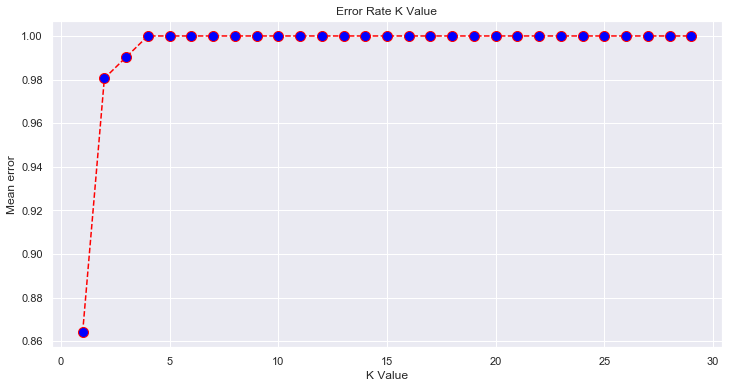

In [132]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),error,color='red', linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean error')

In [133]:
#k=3
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [134]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using KNNR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using KNNR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_K=metrics.r2_score(y_test, y_pred)
print('Accuracy KNNR: ',acc_K)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using KNNR: 0.8902196318573777
Performance on testing data using KNNR: 0.8078817663272165
Accuracy KNNR:  0.8078817663272165
MSE:  0.20054457616295157


In [135]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor'], 'accuracy': [acc_K]},index={'15'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


##### K fold cross validation

In [136]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.7987594894954005
Standard Deviation:  0.045591853179593744


C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [137]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['KNN Regressor k fold'], 'accuracy': [accuracy]},index={'16'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results


,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


#### Support Vector Regressor

In [138]:
model = SVR(kernel='linear')
model.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [139]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using SVR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using SVR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_S=metrics.r2_score(y_test, y_pred)
print('Accuracy SVR: ',acc_S)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using SVR: 0.7195312919938222
Performance on testing data using SVR: 0.6932035001931365
Accuracy SVR:  0.6932035001931365
MSE:  0.32025265299303374


In [140]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': [acc_S]},index={'17'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


##### K fold cross validation

In [141]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.6971192327136142
Standard Deviation:  0.036742110058929286


In [142]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['SVR k fold'], 'accuracy': [accuracy]},index={'18'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


#### Ensemeble KNN Regressor, SVR, LR

In [143]:
#Multiple model Ensemble
from sklearn import svm
LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [144]:
evc=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
evc.fit(X_train, y_train)

VotingRegressor(estimators=[('LR',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('KN',
                             KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                                 metric='minkowski',
                                                 metric_params=None,
                                                 n_jobs=None, n_neighbors=3,
                                                 p=2, weights='uniform')),
                            ('SVM',
                             SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='linear',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False))],
                n_jobs=None, weights=None)

In [145]:
y_pred = evc.predict(X_test)
# performance on train data
print('Performance on training data using ensemble:',evc.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',evc.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)
print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8213604308836657
Performance on testing data using ensemble: 0.7849191766894733
Accuracy ensemble:  0.7849191766894733
MSE:  0.22451430937603264


In [146]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'19'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


##### K fold cross validation

In [147]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(evc,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\Users\abhole\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Average accuracy:  0.7803291490734494
Standard Deviation:  0.029918532582796694


In [148]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble k fold'], 'accuracy': [accuracy]},index={'20'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.832190
2,Decision Tree k fold,0.870329
3,Decision Tree2,0.841788
4,Pruned Decision Tree,0.654828
5,Pruned Decision Tree k fold,0.674552
6,Pruned Decision Tree2,0.663468
7,Random Forest Regressor,0.904976
8,Random Forest Regressor k fold,0.913412
9,Gradient Boost Regressor,0.891594
10,Gradient Boost Regressor k fold,0.899651


    1.After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.
    
    2.Now as the dataset have different gaussians, we can apply k means clustering and then we can apply the models and compare the accuracy.

#### Bootstrap Sampling

In [149]:
concrete_XY = X.join(y)

##### Using Gradient Boosting Regressor

In [150]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

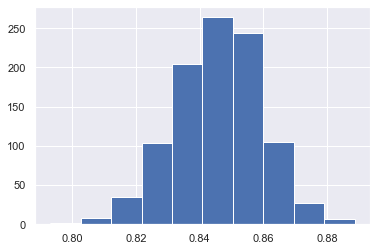

95.0 confidence interval 81.8% and 87.1%


In [151]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Using Random Forest Regressor

In [152]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

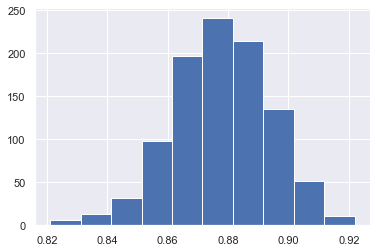

95.0 confidence interval 84.3% and 90.7%


In [153]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))